# Pricing convertible bonds with monte carlo approach
Author: Zheng Liu

# Abstract

This paper used Monte Carlo simulation to price convertible bonds listed in China. In the simulation, we incorporated the real conditions of conversion provisions, redemption provisions and put provisions of each bond.

Studied all 138 Chinese convertible bond that was initially listed between 01/2016 and 04/2019. 

Simulated 1000 stock price paths per bond per date by assuming that prices follow geometric Brownian motion in a risk-neutral environment. Incorporated the real conditions of conversion clause, redemption clause and put clause of each bond to calculate the expected payoff of each path. 

Computed the model price by averaging the payoffs of all paths of each pricing date. Priced all 138 bonds for the first 6 months after the initial listing and got 11,339 model prices of different convertible bonds in total. The average difference between the model prices and the market prices is 3.34%. 42% of the time series of model prices are cointegrated with time series of the market prices under 95% confidence level.


# Introduction
A convertible bond is a type of bond that the holder can convert into a specified number of shares of common stock in the issuing company or cash of equal value. It could be viewed as the combination of bonds and call options on the underlying securities. This interpretation allows us to price convertible bonds using standard option pricing techniques. 

The market of convertible bonds is booming in China. For the first half of 2019, there are 62 convertible bonds, worth of 20 billion USD, that went into public. The number of bonds increased by 210% and the amount of money increased by 570% over the same period last year. The latter even exceeded last year's total amount. Accordingly, there are tons of capital pouring into this market. Some have claimed that the new era of the market of convertible bonds has come in China.

There are many reasons behind this boom. Firstly, since Chinese government put more restrictions on financing methods during 2018, listed company have to resort to other ways, such as convertible bonds, to fund themselves. In addition, the embedded option to convert bonds to stocks makes convertible bonds more stock-like and easier to speculate. Compared to those of the Chinese A-share stock market, the characters of the convertible bonds market, such as T+0 trading system and no limit on the rise of fall in a single trading day, are more favorable for many institutional investors.

A typical convertible bond listed in China contains four provisions that could significantly influence the price of it: the convert provisions, the redemption provision, the put provision and the reset provision. All of the provisions, except for the convert provision, is highly path-dependent.

The convert provision allows the bondholder to convert the bond into a specified number of shares, which equals to the face value of the bonds divided by the conversion price, of underlying common stock. This is a very classic American call option on the stock. In theory, the holder of American call option won’t exercise in advance. Generally, the start date of conversion is 6 months after the first listing date.

The redemption provision is the right of issuer to call back the bond at a pre-determined price. For example: “During the duration of convertible period, if the close price of the company's stock is not less than 130% of the current convertible price (including 130%) for at least 15 trading days in any 30 consecutive trading days, the company has the right to redeem part or all of the convertible bonds according to the face value of the bonds plus the current accrued interest”.

The put provision entitles the holder to sell back the bonds to the issuer if the stock price is significantly lower than the conversion price. In general, this right could only be exercised during the last one or two years of the duration of the bond. For instance, “Since the fifth interest-bearing year of convertible bonds, if the closing price of the company's stock is lower than 70% of the current convertible price for 30 consecutive trading days, the holder of convertible bonds has the right to sell all or part of the convertible bonds he holds back to the company at face value of 103% (including the interest of the current interest-bearing year”.

The reset provision is the right of issuer to lower the conversion price under certain conditions. A typical reset provision is as the following: “During the duration of convertible bonds, when the closing price of the company's stock on is below 90% of the current convertible price for at least 10 trading days of any 20 consecutive trading days, the board of directors of the issuing company has the right to propose a downward revision of the convertible price and submit it to the shareholders' meeting to vote”. 

Unlike the other three provisions, which have definite path, the timing to reset is hard to determine in the real world. With the reset clause, the price of convertible bonds will suffer considerable fluctuations, especially when the underlying stock price is severely depressed. In particular, the issuer would be exposed to the risk of conversion failure if the underlying stock price is substantially lower than the conversion price. That is to say, bond investors will demand redemption before maturity, causing heavy cash flow burden to the issuer and endanger the financial situation of the issuer. One the other hand, exercising reset clause would not only dilute existing shareholders but also indicate that the management has little faith in the future stock price. In addition, the extend of conversion price reduction is not pre-determined if the reset provision is exercised. Therefore, whether to execute this right is a complex trade-off faced by the issuer. In the real world, there are several convertible bonds in the market that meet the conditions to reset but refused to do so for a very long period.

Because the execution of reset provision depends largely on the subjectivity of the management, it’s difficult to include it into pricing model. Hence most literature generally assumes that the conversion price is fixed and ignores the reset provision. Here, to minimize the effect of reset provision, we only study the convertible bonds price for the first 6 months after listing, when the stock price normally would not deviate too much from the conversion price and trigger the reset clause.

# Method Introduction

## Monte Carlo Simulation

Owing to the characters of redemption provision, put provision and the reset provision, the convertible bond listed in China is a highly path-dependent instrument, which could be valued through Monte Carlo simulation. 

Monte Carlo Simulation is widely used multiple fields. It is applicable to the pricing of multi-dimensional derivatives with characteristics such as discrete coupon dividends and path dependence. Therefore, it has gradually become one of the most effective pricing methods for convertible bonds.

The basic idea of Monte Carlo simulation is to generate multiple paths of underlying stock price and to find out the optimal exit of the convertible bond, i.e., whether the bond would be hold to maturity or convert option/ call option/ put option/ reset option would be exercised prior to the maturity. With lots of repeated stochastic simulations on the path of stock prices, the average of the payoffs is the final value of the convertible bonds.

In this paper, we try to make our analysis as close to the real-world condition as possible. In other words, we run our simulation based on the specific provisions of different convertible bonds. 

## Assumptions and constraint conditions

Assumption 1. The underlying stock price follows a geometric Brownian motion in a risk-neutral environment. 
$$
𝑑𝑆 = 𝜇̂𝑆𝑑𝑡 + 𝜎𝑆𝑑𝑧
$$
𝑑𝑧 - standard Brownian motion. 

𝜇̂ - yield in a risk-neutral world.

𝑆 - the underlying stock price. 

σ - volatility of the underlying stock price, or the standard deviation of return of stock. 

The above equation could also be rewrite as follows:

$$
S_{(t + ∆t)} = S_{(t)}*𝑒^{(𝜇̂−𝜎^2⁄2)∆𝑡+𝜎𝜀√∆𝑡}
$$

With the above random process, we could run the log simulation on the price of stock.

Assumption 2. The bondholder would rationally convert the bonds to stocks when the underlying stock price meet the condition to trigger the redemption provision. 

Assumption 3. The bondholder would rationally sell back the bond to the issuer when the underlying stock price meet the condition to trigger the put provision.

Assumption 4: The bondholder would hold the bond to maturity if neither redemption provision or put provision is triggered during the duration of the bond. This is because the holders of American call options will not exercise their rights in advance.

Assumption 5: The underlying stock pays no dividend. This assumption is reasonable since most listed companies in China don’t pay dividend.

Assumption 6: There are 252 trading days within a year.


## Steps of pricing

1)	On each date of pricing, set the close price of underlying stock on that date as S(0), ∆t as 1 day, and the length of steps as the remaining duration of days of the convertible bond to the maturity. Then we simulate the stock price according to the following equation:
$$
S_(t + ∆t) = S_(t)*𝑒^{(𝜇̂−𝜎^2⁄2)∆𝑡+𝜎𝜀√∆𝑡}
$$
S - the underlying stock price. 

∆𝑡 - 1 trading day.

𝜀 - 𝜀 ~ N(0,1).

𝜇̂ - yield in a risk-neutral world. Here we used the yield of the treasury plus certain risk premium. The risk premium depends on the credit rating of the bond. (‘A+’—0.03, ‘AA-’— 0.027, ‘AA’— 0.025, ‘AA’ — 0.02, ‘AAA-’ — 0.017, ‘AAA’ — 0.015). For example, on the pricing date, if the convertible bond has a remaining 5.5-year duration, and the credit rating of it is ‘AAA’, then 𝜇̂ = the yield of 5.5-year treasury on the pricing date + 0.015. 

σ - volatility of the underlying stock price, or the standard deviation of return of stock. To reduce the periodical volatility spike, we used 65-day exponential moving average volatility instead.

For each pricing, we run 1000 simulations, i.e., we get 1000 paths of stock price.

2)	For each simulation, when the steps of the path exceed the start date of redemption provision, we would examine whether the simulated stock prices meet the condition to exercise the redemption option. For instance, a common redemption provision would be like ‘15/30, 130%, 104’, meaning that during the past 30 trading days, if the underlying stock price has been higher than 130% of conversion price for at least 15 trading days, the issuer would buy back all the convertible bonds at the pre-determined redemption price of 104. The redemption price is between 103 to 108 for all convertible bonds trading on the market at present. On each step, we would check the stock prices for the previous 30 days, If the redemption condition is satisfied, all the bondholders would convert the bonds to stocks to achieve greater payoff. Since bondholders would gradually convert their bonds during this period when they expect the redemption provision would be triggered, we used the mean of the 30-day stock prices to calculate payoff. The execution of redemption would mean the end of the current path. Then we discount the payoff to the present pricing date as the expected payoff of this path:

$$
Payoff = e^{-rt}*\frac{100(Face Value Of The Bond))}{Conversion Price} * Average Stock Price For The Past 30 Days
$$

3)	When the steps of the path exceed start date of put provision, if the redemption is not exercised, we would further check whether the simulated stock prices satisfy the condition to trigger the put provision. An example of put provision is ‘25/30, 70%, 102’, meaning that during the last 30 trading days, if the underlying stock price has been lower than 70% of the conversion price for at least 25 trading days, the bondholder would have the right to sell back the bond to the issuer at the pre-determined price of 102. At this scenario, all the bondholders would sell back the convertible bonds since the current stock price is significantly lower than the conversion price. The current path would be terminated when the put option is exercised. Then we would discount this payoff to the present date as the expected payoff. Hence, the payoff at this path would be:

$$
Payoff=e^{-rt} * Put Price
$$

4)	If neither redemption provision or put provision is executed during the duration of the bond, the bondholder would hold the bond until maturity. At the last day, bondholders would compare the payoff of convert the bond to stock with the redemption price. If the former is higher, the bondholders would convert bonds and sell the stocks, otherwise the bondholders would sell back the bonds to the issuer at the redemption price. So for each one of such a path, the payoff would be:

$$
payoff=e^{-rt} * MAX(V_{Conversion Value},V_{Resemption Price})
$$

$$
V_{Conversion Value} = \frac{100(Face Value Of The Bond))}{Conversion Price} * Underlying Stock Price
$$


5)	The model price of convertible bond would be the average expected payoff of all 1000 simulated path:

$$
Convertible Bond Price = \frac{ \sum_{i=0}^{1000} Payoff_i}{1000}
$$

## Main Code

The main code is shown below.

In [ ]:
def get_monte_carlo_price(bond_name, date, simulations):    
    '''
    pricing the convertible bonds based on monte carlo simulation
    return model price and real price on that date
    
    bond_name - the name of the convertible bonds
    date - the pricing date
    simulations - the number of paths in each simulation
    '''
    # assume that the divident rate of stocks is 0
    dividend_rate = 0
    
    # get convertible bond info
    all_info = rq.convertible.all_instruments()
    info = all_info[all_info['symbol'] == bond_name]
    order_book_id = info['order_book_id'].iloc[0]
    stock_code = info['stock_code'].iloc[0]
    maturity_date = info['maturity_date'].iloc[0]
    conversion_start_date = info['conversion_start_date'].iloc[0]
    conversion_end_date = info['conversion_end_date'].iloc[0]
    value_date = info['value_date'].iloc[0]
    de_listed_date = info['de_listed_date'].iloc[0]
    
    # get the close price of underlying stock on pricing date
    real_price = get_price(order_book_id, start_date=date, end_date=date, frequency='1d', fields=None, 
                           adjust_type='pre', skip_suspended =False, market='cn')['close'].iloc[0]
    
    # get the credit rating of the bond
    credit = credit_rating[credit_rating['symbol'] == bond_name]['credit_rating'].iloc[0]
    
    # get the current yield curve
    yc = rq.get_yield_curve(end_date=date).iloc[-1]
    
    # get the treasury yield according to the remaining duration of the bond
    date_pd = pd.Timestamp(date)
    time_remain_month = ((maturity_date - date_pd).days)/30
    time_remain_year = ((maturity_date - date_pd).days)/365

    if time_remain_year <= 1:
        if time_remain_month <= 1:
            risk_free = yc['1M']
        elif time_remain_month <= 2:
             risk_free = yc['2M']
        elif time_remain_month <= 3:
            risk_free = yc['3M']
        elif time_remain_month <= 6:
             risk_free = yc['6M']
        elif time_remain_month <= 9:
             risk_free = yc['9M']
        else: 
            risk_free = yc['1Y']
    else:
        year = math.ceil(time_remain_year)
        risk_free = yc[str(year)+'Y']
        if str(risk_free) == 'nan':
            risk_free = (yc[str(year-1)+'Y'] + yc[str(year+1)+'Y'] )/2
    
    # add risk premium based on credit rating
    if credit == 'A+':
        rf = risk_free + 0.03
    if credit == 'AA-':
        rf = risk_free + 0.027
    if credit == 'AA':
        rf = risk_free + 0.025
    elif credit == 'AA+':
        rf = risk_free + 0.02
    elif credit == 'AAA-':
        rf = risk_free + 0.017
    elif credit == 'AAA':
        rf = risk_free + 0.015
        
    # get the underlying stock prices 
    start = date[:2] + str(int(date[2:4]) - 3) + date[4:]
    stock_price = zw.get_stocks_price([stock_code],start,date,adjust_type='post').dropna(subset = ['close'])
    stock_price_noadj = zw.get_stocks_price([stock_code],start,date, adjust_type='none').dropna(subset = ['close'])
    spot_price = stock_price_noadj['close'].iloc[-1]

    # calculate volatility of return(EMA65)
    stock_price['ret'] = stock_price['close']/stock_price['close'].shift(1) - 1
    stock_price['vol'] = pd.Series()
    for i in range(120,len(stock_price)):
        stock_price['vol'].iloc[i] = np.std(stock_price['ret'].iloc[i-120:i])    
    stock_price['vol'] = stock_price['vol']*np.sqrt(252) 
    stock_price['vol_ema'] = ta.EMA(stock_price['vol'],65)
    spot_vol = stock_price['vol_ema'][-1]
    
    # get the conversion price
    conversion_price = rq.convertible.get_conversion_price(order_book_id)
    date_pd = pd.Timestamp(date)
    strike_price = -1

    if date_pd >= conversion_price['effective_date'].iloc[-1]:
        strike_price = conversion_price['conversion_price'].iloc[-1]
    else:
        for i in range(len(conversion_price) - 1):
            if date_pd >= conversion_price['effective_date'].iloc[i] and date_pd < conversion_price['effective_date'].iloc[i+1]:
                strike_price = conversion_price['conversion_price'].iloc[i]
                break

    if strike_price == -1:
        #print(bond_name + ':计算时间在初次转股价格发布日之前')
        sys.exit(0) 
        
        
    # get the conditions of redemption
    redumption_con = redumption[redumption['证券简称'].str.contains(bond_name)] 
    redumption_time_period = int(redumption_con.iloc[0,6])
    redumption_count_period = int(redumption_con.iloc[0,7])
    redumption_percent = redumption_con.iloc[0,8]/100
    redumption_price = all_info[all_info['symbol']==bond_name]['redemption_price'].iloc[0]
    
    # get the conditions of put
    put_con = put[put['证券简称'].str.contains(bond_name)]
    put_start_date = put_con.iloc[0,3]
    put_time_period = int(put_con.iloc[0,5])
    put_count_period = int(put_con.iloc[0,6])
    put_percent = put_con.iloc[0,7]/100
    put_price = 101 # assume the remaining interest is 1
    
    # get the number of trading days till maturity(steps of simulation)
    natrual_days = conversion_end_date - date_pd
    natrual_days = natrual_days.days
    n = int(natrual_days/365*252)
    
    # get the start date of conversion
    conversion_start_days = conversion_start_date - date_pd
    conversion_start_days = conversion_start_days.days
    conversion_start = int(conversion_start_days/365*252)
    
    # get the start date of put 
    put_start_days = put_start_date - date_pd
    put_start_days = put_start_days.days
    put_start = int(put_start_days/365*252)

    # simulate the stock prices 
    v = spot_vol
    r = rf
    S = spot_price
    strike = strike_price
    
    convertion_ratio = 100/strike
    AT = 1/252
    
    if conversion_start > 0:
        stockvalue = np.zeros((simulations,n))
        stockvalue[:,0] = S
        for i in range(simulations):
            for j in range(1,n):
                stockvalue[i,j] = stockvalue[i,j-1]* exp((r - 0.5 * v**2) * AT + v * sqrt(AT) * gauss(0,1.0))

        # calculate the payoff of each path based on the condition of provisions   
        payoff = np.zeros((simulations,n))
        for i in range(simulations):
            for j in range(conversion_start + 30,n):
                select =  stockvalue[i,j-redumption_time_period:j]
                redumption_check = [x for x in select if x > strike*redumption_percent]

                if len(redumption_check) >= redumption_count_period:
                    payoff[i,j] = np.mean(redumption_check)*convertion_ratio
                    payoff[i,n - 1] = payoff[i,j]*exp(r*(n-1-j)/252)
                    break

                elif j > put_start:
                    put_check = [x for x in select if x < strike*put_percent]
                    if len(put_check) == 30:
                        payoff[i,j] = put_price
                        payoff[i,n - 1] = payoff[i,j]*exp(r*(n-1-j)/252)
                        break
                        
        # if neither redemption clause nor put clause is triggered, we compare the conversion value of the last date with the redemption price
        for i in range(simulations):
            if payoff[i, n-1] == 0:
                payoff[i, n-1] = max(stockvalue[i, n-1]*convertion_ratio, redumption_price)
        # discount the payoffs and calculate the model price
        pv = np.mean(payoff[:,n-1])*exp(r*-n/252)

    return pv, real_price

# Empirical Analysis

This task is both IO-intensive and computing-intensive. By taking advantage of multiprocessing package in Python, an 8-core server-level CPU took 5 hours to finish the program.

In [2]:
def get_table(bond_name):
    '''
    function to calculate time series of model price by bond name
    '''
    table = []
    # get bond info
    all_info = rq.convertible.all_instruments()
    info = all_info[all_info['symbol'] == bond_name]
    order_book_id = info['order_book_id'].iloc[0]
    conversion_start_date = info['conversion_start_date'].iloc[0]
    value_date = info['value_date'].iloc[0]


    # get the close price of underlying stocks
    real_price = get_price(order_book_id, start_date=value_date, end_date=conversion_start_date, frequency='1d', fields=None, 
                           adjust_type='pre', skip_suspended =False, market='cn')
    date = real_price.index
    date_str = [str(x)[:10] for x in date]

    for date in date_str:
        try:
            result = get_monte_carlo_price(bond_name, date, 500)
            table.append([date, bond_name, result[0], result[1]])
        except:
            continue
    print(bond_name + ' is finished')
    
    return table

# using multiprocessing package to speed up the task
from multiprocessing import Pool
pool = Pool(processes= 8)
result = []
for bond_name in bond_list2:
    result.append(pool.apply_async(get_table,(bond_name)))
pool.close()
pool.join()
df = pd.DataFrame()
for res in result:
    b = pd.DataFrame(res.get())
    df = df.append(b)


We get 11,339 prices of different convertible bonds in total.
The initial result is rather promising. The average ratio of model prices to real close price of convertible bonds is 103.34%, which is significantly lower than the results of many other models.

Results are shown as follows:

In [1]:
import pandas as pd
store  =  pd.HDFStore('monte_carlo_pricing.h5')
result = store['model_result']
store.close()
result

,date,order_book_id,bond_name,calculation_price,real_price,cal_to_real
0,2016-01-18,110032.SH,三一转债,105.844448,107.690,0.982862
1,2016-01-19,110032.SH,三一转债,110.877264,106.580,1.040320
2,2016-01-20,110032.SH,三一转债,108.682602,105.050,1.034580
3,2016-01-21,110032.SH,三一转债,103.827301,105.020,0.988643
4,2016-01-22,110032.SH,三一转债,106.702277,105.980,1.006815
5,2016-01-25,110032.SH,三一转债,106.354530,106.930,0.994618
6,2016-01-26,110032.SH,三一转债,103.681529,105.410,0.983602
7,2016-01-27,110032.SH,三一转债,103.407483,105.300,0.982027
8,2016-01-28,110032.SH,三一转债,100.980664,105.630,0.955985
9,2016-01-29,110032.SH,三一转债,103.915316,105.840,0.981815


In [2]:
result['cal_to_real'].mean()

1.0334577337869075

We further examine the time series of the model prices. Here we only check the convertible bonds that has been trading on the markets for at least 30 days before 05/01/2019. 

One useful method to test whether the model price could accurately measure the market price is to run cointegration test.  

In [8]:
import statsmodels
from statsmodels.tsa.stattools import coint

coint_list = []
number_T = 0
number_F = 0
for order_book_id in result['order_book_id'].drop_duplicates():
    try:
        select = result[result['order_book_id'] == order_book_id]
        if len(select) >= 30:
            score, pvalue, _ = coint(select['calculation_price'],select['real_price'])
            ratio_mean = select['cal_to_real'].mean()
            if pvalue <= 0.05:
                number_T = number_T + 1
            else:
                number_F = number_F + 1
            coint_list.append([order_book_id, pvalue,ratio_mean])
    except:
        continue
print('The number of bonds that pass the conintegration test is ' + str(number_T) )
print('The number of bonds that fail to pass the conintegration test is ' + str(number_F) )

The number of bonds that pass the conintegration test is 47
The number of bonds that fail to pass the conintegration test is 65


Under 95% confidence level, 42% (47/112) of the model prices pass the cointegration test. 

This result shows that our model is quite precise for some of the convertible bonds.  Due to the market noise and assumption errors, it is unlikely that the model price could perfectly match the market price. That the two prices are statistically cointegrated could be a strong indicator that the model price is relatively accurate from the perspective of time series. The market maker and arbitrageur could also take advantage of this model to correct mispriced convertible bonds on the market.

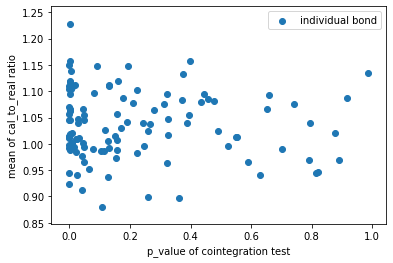

In [39]:
import matplotlib.pyplot as plt
df_conint = pd.DataFrame(coint_list, columns = ['order_book_id','p_value','ratio_mean']).sort_values(by = 'p_value')
#ax1.set_title('Scatter Plot') 
#plt.figure(figsize = (5,5))
plt.xlabel('p_value of cointegration test') 
plt.ylabel('mean of cal_to_real ratio') 
plt.scatter(df_conint['p_value'],df_conint['ratio_mean']) 
plt.legend(['individual bond']) 
plt.show()

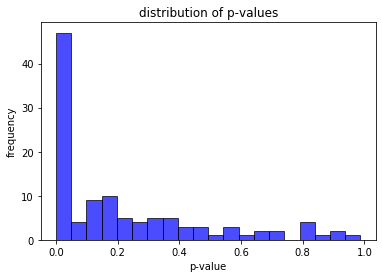

In [40]:
plt.hist(df_conint['p_value'], bins=20, density=0, facecolor="blue", edgecolor="black", alpha=0.7)
# show the label of horizontal axis
plt.xlabel("p-value")
# show the label of longitudinal axis
plt.ylabel("frequency")
# show the title
plt.title("distribution of p-values")
plt.show()